# **Dashboards and ploty**

**Yibriham Iñiguez Arteaga**

**A01540614**

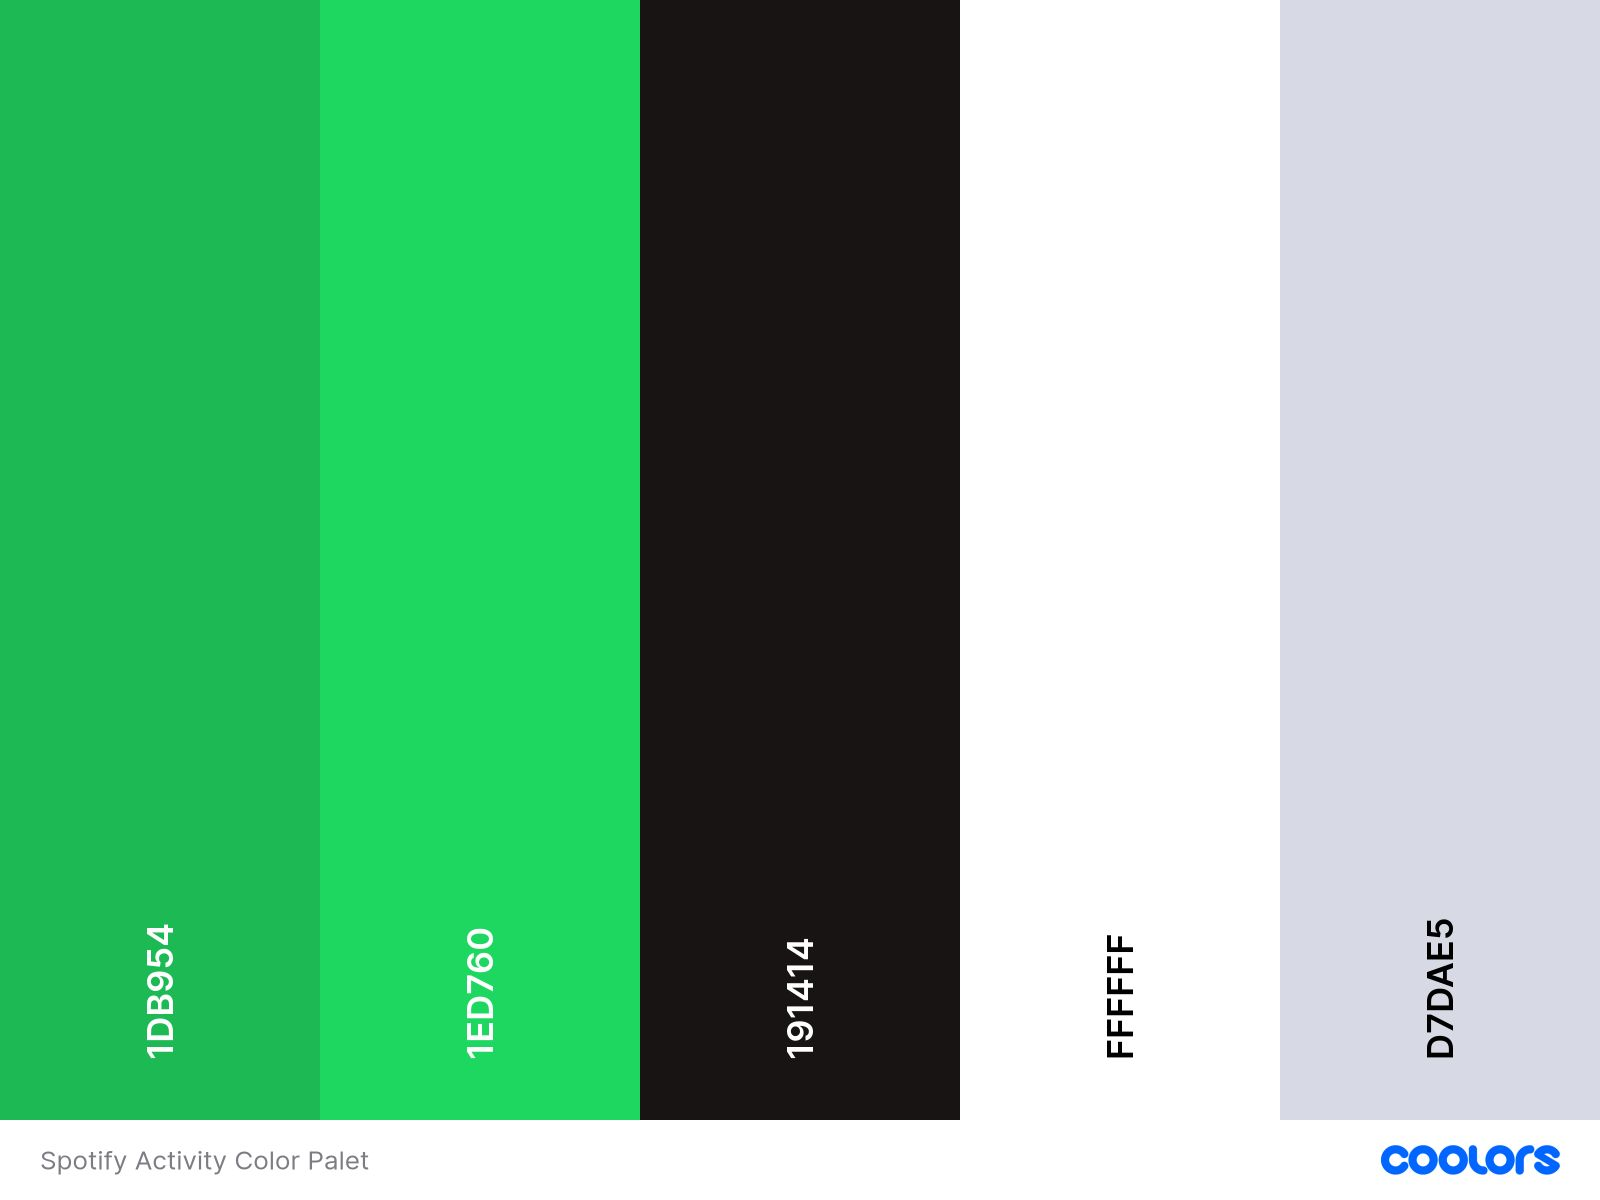

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import altair as alt

In [1]:
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go
import colorsys

df = pd.read_csv("Hostel.csv")

In [2]:
if "Unnamed: 0" in df.columns:
    df = df.drop(columns=["Unnamed: 0"])
df["Distance_km"] = (
    df["Distance"]
    .str.extract(r"([\d\.]+)", expand=False)
    .astype(float)
)

df.head()

,hostel.name,City,price.from,Distance,summary.score,rating.band,atmosphere,cleanliness,facilities,location.y,security,staff,valueformoney,lon,lat,Distance_km
0,"""Bike & Bed"" CharinCo Hostel",Osaka,3300,2.9km from city centre,9.2,Superb,8.9,9.4,9.3,8.9,9.0,9.4,9.4,135.513767,34.682678,2.9
1,& And Hostel,Fukuoka-City,2600,0.7km from city centre,9.5,Superb,9.4,9.7,9.5,9.7,9.2,9.7,9.5,NaN,NaN,0.7
2,&And Hostel Akihabara,Tokyo,3600,7.8km from city centre,8.7,Fabulous,8.0,7.0,9.0,8.0,10.0,10.0,9.0,139.777472,35.697447,7.8
3,&And Hostel Ueno,Tokyo,2600,8.7km from city centre,7.4,Very Good,8.0,7.5,7.5,7.5,7.0,8.0,6.5,139.783667,35.712716,8.7
4,&And Hostel-Asakusa North-,Tokyo,1500,10.5km from city centre,9.4,Superb,9.5,9.5,9.0,9.0,9.5,10.0,9.5,139.798371,35.727898,10.5


In [3]:
## colores
spotify_green1 = "#1DB954"
spotify_green2 = "#1ED760"
spotify_black  = "#191414"
spotify_white  = "#FFFFFF"
spotify_gray   = "#D7DAE5"

In [5]:
def hex_to_rgb(hex_color):
    hex_color = hex_color.lstrip("#")
    return tuple(int(hex_color[i:i+2], 16)/255.0 for i in (0, 2, 4))

def rgb_to_hex(rgb):
    return "#{:02X}{:02X}{:02X}".format(
        int(rgb[0]*255), int(rgb[1]*255), int(rgb[2]*255)
    )

def rotate_hue(hex_color, offset):
    r, g, b = hex_to_rgb(hex_color)
    h, l, s = colorsys.rgb_to_hls(r, g, b)
    h = (h + offset) % 1
    r2, g2, b2 = colorsys.hls_to_rgb(h, l, s)
    return rgb_to_hex((r2, g2, b2))
comp_green2   = rotate_hue(spotify_green2, 0.5)      # 180°
triad1_green2 = rotate_hue(spotify_green2, 1/3)      # +120°
triad2_green2 = rotate_hue(spotify_green2, -1/3)     # -120°

monochrome_palette   = [spotify_black, spotify_green1, spotify_green2, spotify_white]
complementary_palette = [spotify_green2, comp_green2]
triadic_palette       = [spotify_green2, triad1_green2, triad2_green2]

print("Monocromático:", monochrome_palette)
print("Complementario:", complementary_palette)
print("Triádico:", triadic_palette)

Monocromático: ['#191414', '#1DB954', '#1ED760', '#FFFFFF']
Complementario: ['#1ED760', '#D71E94']
Triádico: ['#1ED760', '#5F1ED7', '#D7601E']


In [6]:
# GRafico 1
fig1 = px.histogram(
    df,
    x="price.from",
    nbins=30,
    title="Distribución de precios por noche (JPY)",
    color_discrete_sequence=[spotify_green2],
    marginal="rug"
)
fig1.update_layout(template="simple_white", plot_bgcolor=spotify_white)
fig1.show()


In [8]:
### Gráfico

fig2 = px.box(
    df,
    x="City",
    y="price.from",
    title="Precio por ciudad",
    color="City",
    color_discrete_sequence=monochrome_palette,
)
fig2.update_layout(template="simple_white", xaxis_title="Ciudad", yaxis_title="Precio (JPY)")
fig2.show()


In [9]:
## Grafico 3
fig3 = px.violin(
    df,
    x="rating.band",
    y="summary.score",
    box=True,
    points="all",
    color="rating.band",
    color_discrete_sequence=triadic_palette,
    title="Distribución de la puntuación por banda de rating"
)
fig3.update_layout(template="simple_white", xaxis_title="Banda de rating", yaxis_title="Puntuación global")
fig3.show()


In [11]:
## grafico 4
mean_score_city = df.groupby("City", as_index=False)["summary.score"].mean()

fig6 = px.bar(
    mean_score_city,
    x="City",
    y="summary.score",
    title="Puntuación promedio por ciudad",
    color="summary.score",
    color_continuous_scale=monochrome_palette,
)
fig6.update_layout(template="simple_white", xaxis_title="Ciudad", yaxis_title="Puntuación promedio")
fig6.show()
